#**WOMEN IN STEM**

**Prepared by:** Anna G Shah, Tibaria Al Nouri, & Neysha Pagán

**Date:** December 17, 2023


## INTRODUCTION
This assignment aims to conduct an analysis of the status of women in STEM. Utilizing an extensive dataset on employment and earnings, we will delve into the complexities of gender differences in employment across various industries. Navigating through this dataset will enable us to gain valuable insights into the women's status in the workforce, illuminating employment and earnings patterns in diverse sectors. The data provides a nuanced perspective on the challenges and opportunities that women face in the professional landscape, fostering a deeper understanding of gender dynamics in the employment domain. By exploring the data, we aim to uncover trends, disparities, and identify potential areas for enhancing gender equity and inclusivity in the STEM workforce.


#### Some facts and figures:
* "2013 American Community Survey microdata indicates that... median annual earnings in STEM occupations requiring a university degree were 64,000 for women and $78,000 for men."

*   "Yet...only 4.6 percent of women work in STEM occupations, compared with 10.3 percent of men."

*  "Nationally, women are 28.8 percent of STEM workers."

*   List item
![biz women money.jpeg](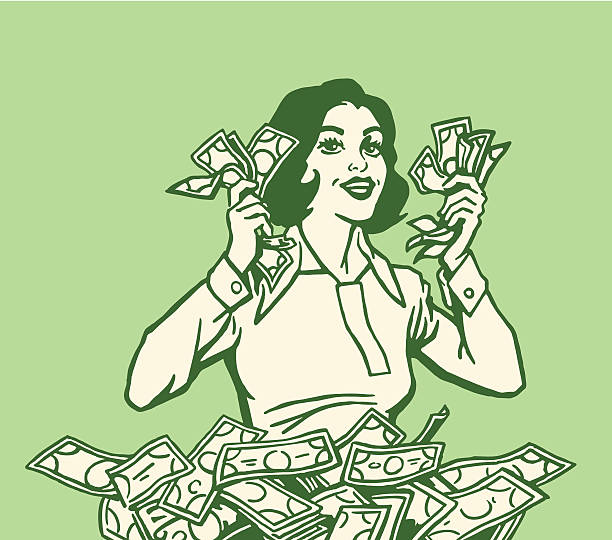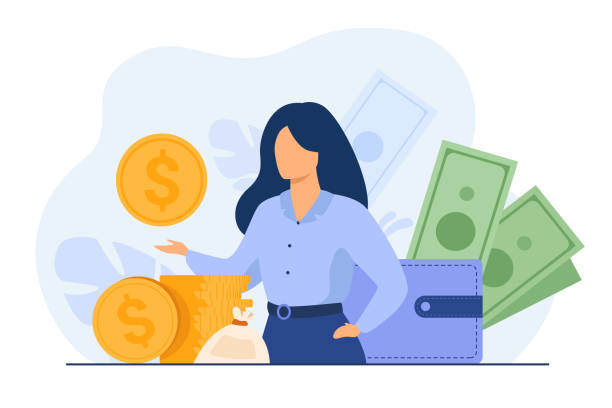)

Source: [Status of Women Data](https://statusofwomendata.org/explore-the-data/employment-and-earnings/employment-and-earnings/#GenderDifferencesinEmploymentbyIndustry)



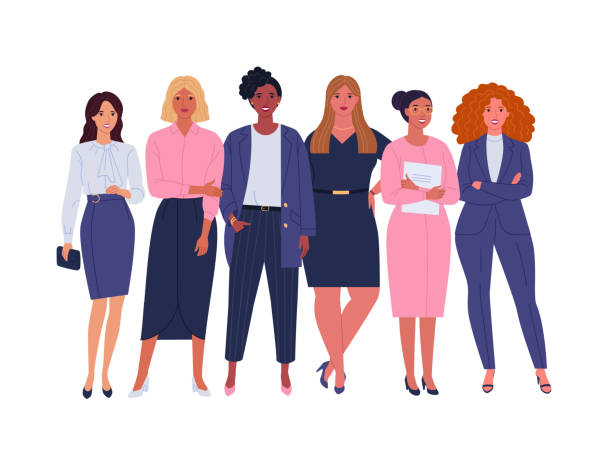

other code sources:


*   https://medium.com/@alex_44314/use-python-geopandas-to-make-a-us-map-with-alaska-and-hawaii-39a9f5c222c6


*   https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=y_JUPS1RnNN7

* Colors for map
https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/#:~:text=Colormaps%20or%20Cmap%20in%20Python%20is%20a%20very%20useful%20tool,own%20custom%20ones%20using%20Python.

### Data sources


*   https://genderdata.worldbank.org/topics/technology/
*   https://statusofwomendata.org/explore-the-data/download-the-data/
*   https://genderdata.worldbank.org/
*   https://statusofwomendata.org/state-data/




## LIBRARIES

In [ ]:
## Source: https://statusofwomendata.org/explore-the-data/download-the-data/
## E-E_DATA.xlsx

import os
import pandas as pd
import xlrd
import openpyxl as op
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import missingno as msno
import os
import openpyxl
import math
import warnings
import locale

warnings.filterwarnings("ignore")


## FUNCTIONS AND PROGRAMS

### Getting and cleanning the data

In [ ]:
# Cleaning data and only using certain sheets in excel
def cleanData(sheet, headerCol):
  xls = pd.ExcelFile("E-E-DATA-for-DOWNLOAD-7-27-2015.xlsx")
  data = pd.read_excel(xls, sheet, header = None)
  df = pd.DataFrame(data).fillna('')
  df.columns = data.iloc[headerCol]
  return df


# Converting applicable columns from decimal to percent
def percent_convert(df, col1, col2=None, col3=None):
    columns_to_convert = [col1]
    if col2 is not None:
        columns_to_convert.append(col2)
    if col3 is not None:
        columns_to_convert.append(col3)

    for column in columns_to_convert:
        df[column] = (df[column] * 100)

    return df

### Graphs Functions

In [ ]:
# Plotting function
def usa_map_func(df, colorcol, title, cmap, legend_size1 = None, legend_size2 = None):
  #read in USA shapefile data for plot
  state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")

  #drop US territories and Hawaii and Alaska bc they make the map wonky
  territories = ['Alaska','Hawaii', 'Puerto Rico', 'American Samoa','Guam','Commonwealth of the Northern Mariana Islands','United States Virgin Islands']
  mask = state_df['NAME'].isin(territories)
  state_df = state_df[~mask]

  #rename column to match women in stem data column name
  state_df.rename(columns = {'NAME':'State'}, inplace=True)

  #set fig size
  fig, ax = plt.subplots( figsize=(20, 30))
  state_df.plot(ax=ax, edgecolor="black", color="white")

  #merge map data with women stem data
  merged_df = state_df.merge(df, on='State', how ='inner')

  #if applicable set the legend size
  legend_kwds = None
  if legend_size1 is not None:
    legend_kwds = {legend_size1 : legend_size2}


  # Plot the selected df with selected column as the data to color
  merged_df.plot(ax=ax, edgecolor="black", column= colorcol, cmap = cmap, legend = True, legend_kwds =legend_kwds)

  # Display
  plt.axis('off')
  plt.title(title)
  plt.show()


#Stacked barchart function
def bar_plot(df, col1, col2, xlabel, ylabel, title):

  #Set chart size
  plt.figure(figsize=(12, 6))

  # x-coordinates
  state = [state for state in df['State']]

  # Heights of bars
  women = [women for women in df[col1]]
  men = [men for men in df[col2]]

  # Plotting a bar chart
  # np arrange is to evenly space intervals
  plt.bar(state, women, label = 'Women', color = 'red')
  plt.bar(state, men, label = 'Men', bottom = women, color = 'blue')
  plt.xticks(range(len(state)), state, rotation='vertical')

  # Displaying the bar chart and naming columns
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend()

  # Function to show the plot
  plt.show()


# Side by side barchart function
def bar_plot2(df, col1, col2, xlabel, ylabel, title):

  #Set chart size
  plt.figure(figsize=(12, 7))

  # x-coordinates
  state = [state for state in df['State']]

  # Heights of bars
  women = [women for women in df[col1]]
  men = [men for men in df[col2]]

  # Plotting a bar chart
  # np arrange is to evenly space intervals
  plt.bar(np.arange(len(state)) -0.2, women, 0.4, label = 'Women', color = 'red')
  plt.bar(np.arange(len(state)) +0.2, men, 0.4, label = 'Men', color = 'blue')
  plt.xticks(range(len(state)), state, rotation='vertical')

  # Displaying the bar chart and naming columns
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend()

  # Function to show the plot
  plt.show()


# One variable barchart function for differences
def bar_plot3(df, var, title):
  # x axis
  states = [state for state in df['State']]

  # y axis
  diff = [diff for diff in df[var]]

  # Plotting a bar chart
  plt.figure(figsize=(12, 6))
  plt.bar(states, diff, label = var, color = 'black')
  plt.xticks(states, rotation='vertical')

  # Displaying the bar chart and naming columns
  plt.xlabel('state')
  plt.ylabel('difference')
  plt.title(title)

  # Function to show the plot
  plt.show()

### Other functions for data analysis

In [ ]:
#Function to input country and see their 2006 percentage of women in technical and professional fields:
def country_stem(df, Country):
  country_avg = df.loc[df['Country Name']== Country,'2006']
  return country_avg

#Function to input country and see the total trend in female graduates in stem over the years
def stem_grads_func(df, Country):
  Country_series = df.loc[df['Country Name']== Country, ['Women grads in STEM %', 'Year']].reset_index(drop=True)
  return Country_series

# Function to set currency format for Earnings
## Set the locale to the United States
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

def format_currency(value):
    return locale.currency(value, grouping=True)

def format_as_dollar_amount(value):
    return locale.currency(value, grouping=True, symbol=False)

# Function to format numbers with commas for thousands
def format_with_commas(value):
    return '{:,.0f}'.format(value)


## PART 1: Representation

The following data details the Percent of All Employed Women and Men Working in Managerial or Professional Occupations by Race/Ethnicity and State (Full-Time, Year-Round Workers Aged 16 and Older), 2013. This data will be plotted on a US map to get a sense of which states have a higher percentage of female professionals.

In [ ]:
#Pulling from status of women data breaking down m:w percent of total employed by state
df1 = cleanData('Manag & prof by race and state', 2)
profs_df = df1.iloc[3:55,[0,7,16]]

# If number is negative then more men
profs_df['Percentage difference'] = profs_df['All Women'] - profs_df['All Men']
profs_df.head()

2,State,All Women,All Men,Percentage difference
3,Alabama,0.377,0.291,0.086
4,Alaska,0.427,0.298,0.129
5,Arizona,0.376,0.326,0.05
6,Arkansas,0.364,0.267,0.097
7,California,0.395,0.345,0.05


In [ ]:
# Calculate average percentage of women and men employed across all states based on the values in the "All Women" and "All Men" columns
avg_percent_women = round(profs_df["All Women"].mean()*100)
avg_percent_men = round(profs_df["All Men"].mean()*100)
print("Average percent of women employed across all states is", avg_percent_women, "percent which is higher than the average percent of men at", avg_percent_men, 'percent.')

Average percent of women employed across all states is 40 percent which is higher than the average percent of men at 33 percent.


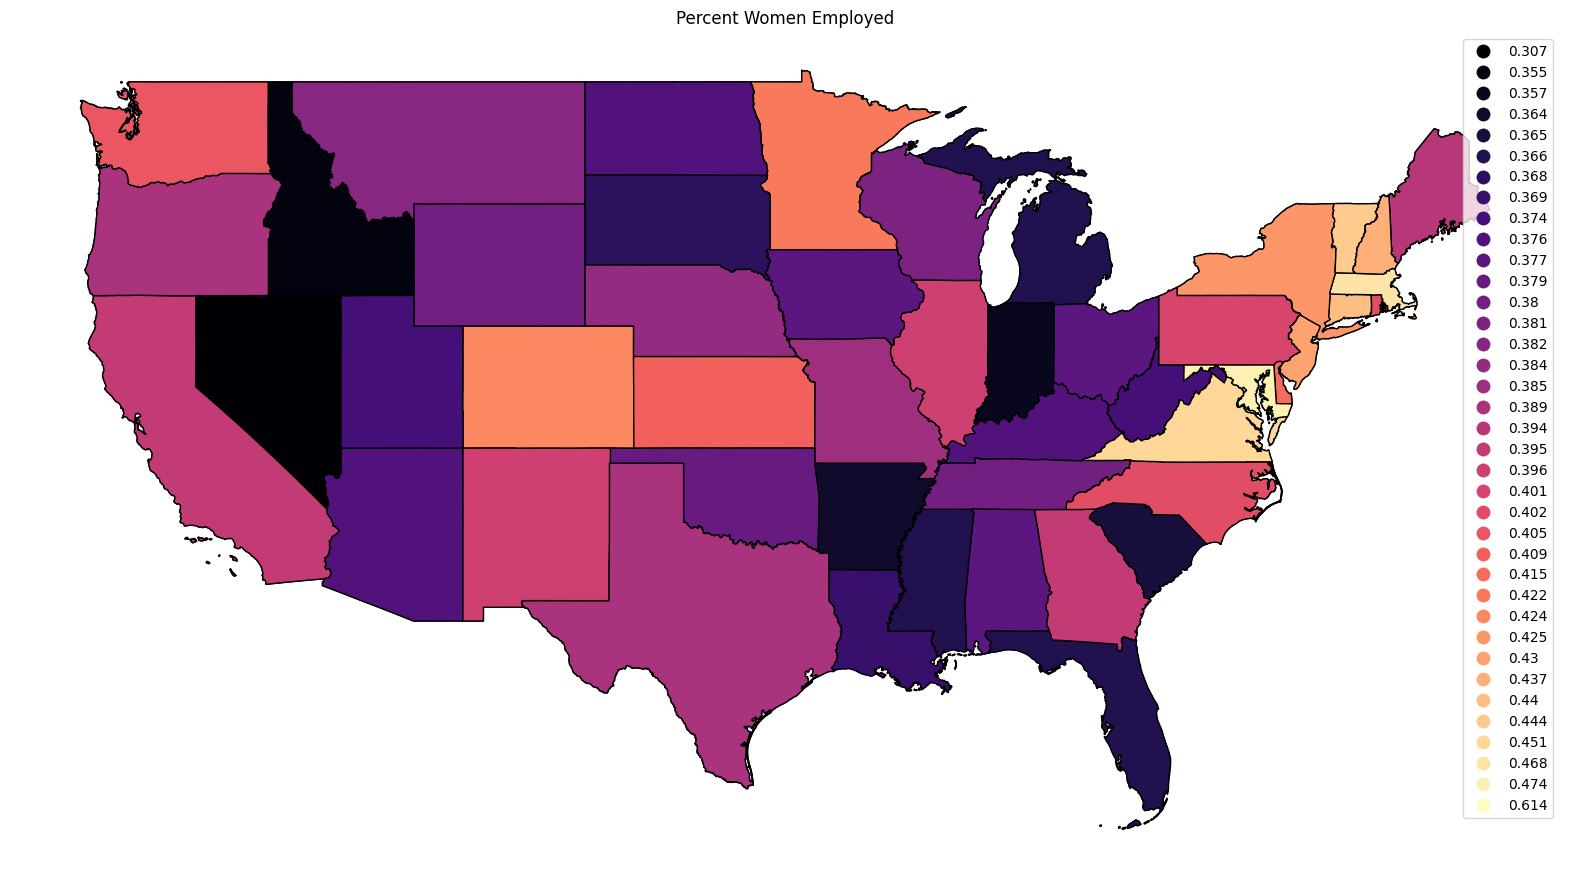

In [ ]:
usa_map_func(profs_df, 'All Women', 'Percent Women Employed', 'magma')

The following data covers Women in Science, Technology, Engineering, and Mathematics (STEM) Occupations, 2013. This data includes what percent of all women employed in this state are in STEM occupations and what percentage women make up of all STEM workers.

In [ ]:
# Percent of women in stem and percent share of female STEM workforce
df2 = cleanData('Share in STEM by state', 1)
stem_df_2013 = df2.iloc[3:55,[0,1,3]]


# Cleaning: edit column names
stem_df_2013.columns.values[0] = "State"

# Cleaning: round percent values
stem_df_2013["Women's Share of All STEM Workers"] =stem_df_2013["Women's Share of All STEM Workers"].apply(lambda x: round(x,2))
stem_df_2013["Percent of Employed Women in STEM Occupations"] =stem_df_2013["Percent of Employed Women in STEM Occupations"].apply(lambda x: round(x, 2))

stem_df_2013.head()
# print(df2)
# df2.to_csv("women_in_STEM_2013.csv")

1,State,Percent of Employed Women in STEM Occupations,Women's Share of All STEM Workers
3,Alabama,0.04,0.26
4,Alaska,0.04,0.25
5,Arizona,0.05,0.27
6,Arkansas,0.03,0.30
7,California,0.05,0.29


In [ ]:
ntl_avg = stem_df_2013["Women's Share of All STEM Workers"].mean()*100
print('The national average of women as a percent of all STEM workers is', round(ntl_avg), 'percent.')

The national average of women as a percent of all STEM workers is 29 percent.


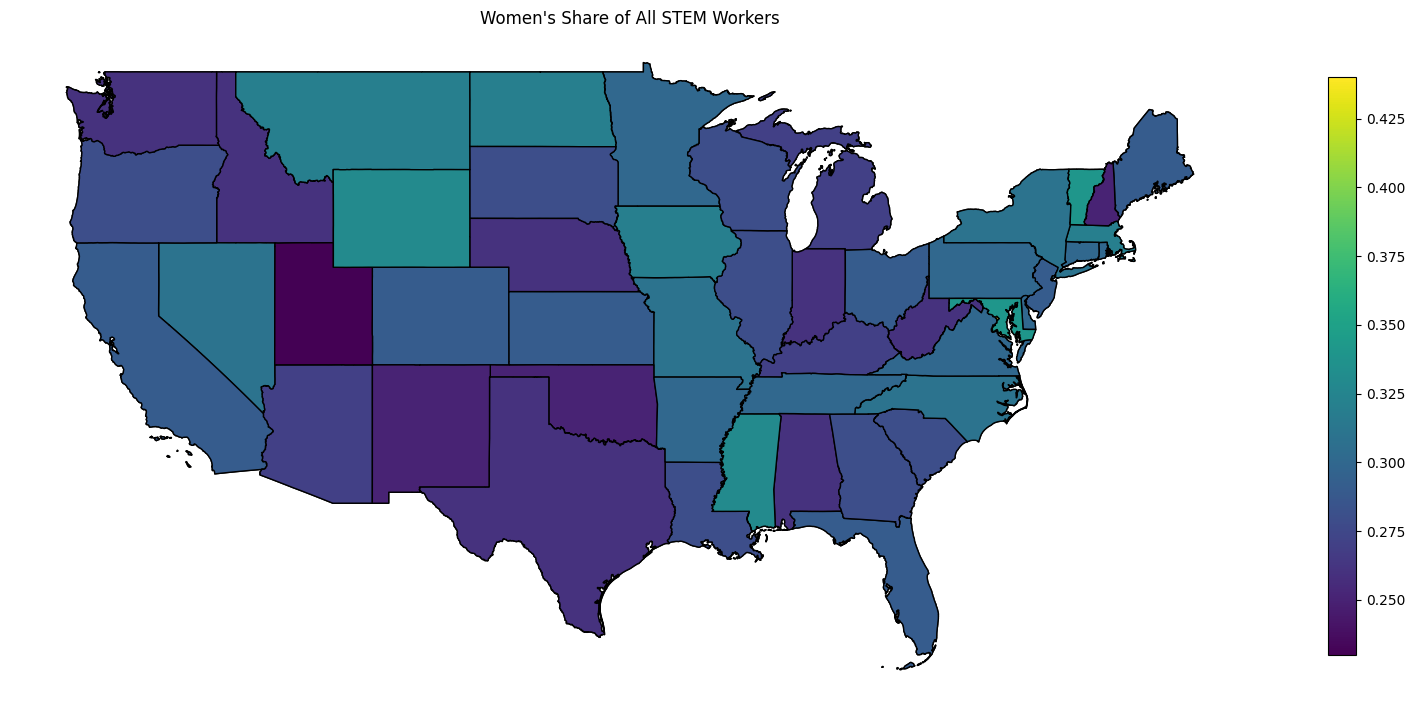

In [ ]:
usa_map_func(stem_df_2013, "Women's Share of All STEM Workers", "Women's Share of All STEM Workers", 'viridis', 'shrink', 0.25)

In [ ]:
# Top 3 states for women in STEM based on women representation
stem_df_2013[stem_df_2013["Women's Share of All STEM Workers"].rank(method='first', ascending=False) <= 3]

1,State,Percent of Employed Women in STEM Occupations,Women's Share of All STEM Workers
11,District of Columbia,0.11,0.44
23,Maryland,0.08,0.34
48,Vermont,0.05,0.34


According to the map and table above the top states for female STEM workers are DC, Maryland and Vermont based on their share of the workforce. That women represent a greater percentage of the workforce in these states could signal several good explanations for other states to learn from:

* There may be better hiring opportunities and economic activity overall which benefits everyone
* More enforced equal opportunity hiring practices
* Active school to career pipelines for underrepresented groups in STEM
* This could be simply a cultural difference in this state women viewed more greatly as equals or potential leaders, career driven subculture in these states or other reasons

There are many policy and cross-functional actions for different states to enable greater opportunities for women!

## PART 2: Earnings

The following data is Median Annual Earnings for Workers Employed Full-Time, Year-Round by Gender and Race and Ethnicity, Aged 16 and Older, from 2013 census data. However the data is simplified just to analyze earnings by gender.

In [ ]:
# Median Annual Earnings for Workers Employed Full-Time, Year-Round by Race and Ethnicity, Aged 16 and Older, 2013
earnings_df = cleanData('Earnings FTYR by race and state', 2)
earnings_df = earnings_df.iloc[3:26,[0,7,16]]

# If negative then men make more
earnings_df['Earnings difference'] = earnings_df['All Women'] - earnings_df['All Men']

# Apply formatting function to specified columns
columns_to_format = ['All Women', 'All Men', 'Earnings difference']
earnings_df[columns_to_format] = earnings_df[columns_to_format].applymap(format_with_commas)

# Look at data
earnings_df.head()

# Earnings_df.to_csv("women_earnings_2013.csv")

2,State,All Women,All Men,Earnings difference
3,Alabama,"32,312","44,533","-12,221"
4,Alaska,"42,151","56,960","-14,809"
5,Arizona,"36,248","44,000","-7,752"
6,Arkansas,"30,439","39,355","-8,916"
7,California,"42,000","50,000","-8,000"


Top Earning Differences by State:
        State All Women All Men Earnings difference  Earnings difference_numeric
    Louisiana     31961   47640          -15,679.00                       -15679
       Alaska     42151   56960          -14,809.00                       -14809
  Connecticut     47486   60879          -13,393.00                       -13393
     Michigan     37000   49718          -12,718.00                       -12718
Massachusetts     47640   60000          -12,360.00                       -12360


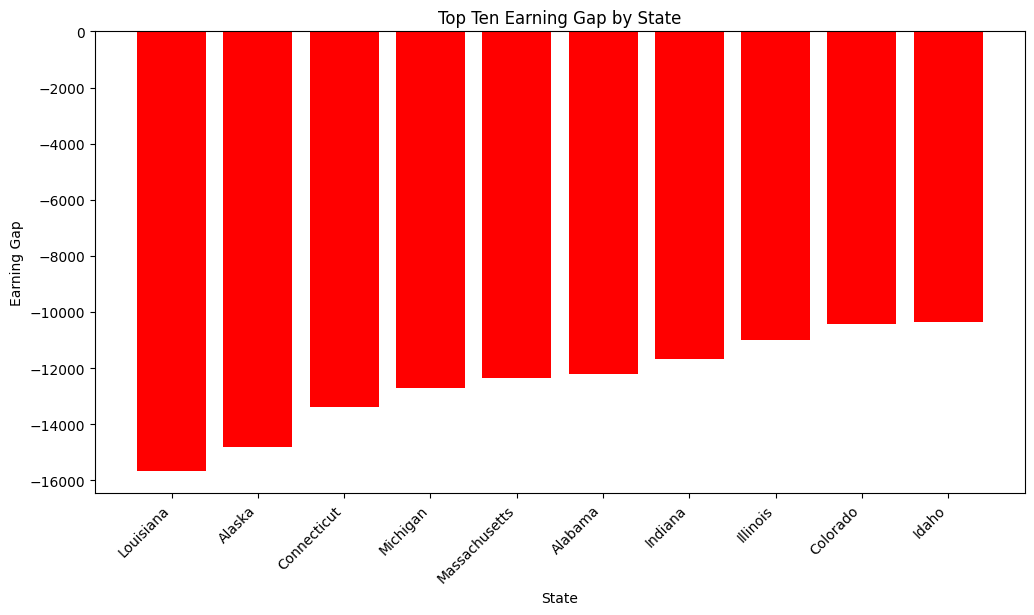

In [ ]:
def bar_plot(data, x_column, y_column, xlabel, ylabel, title):
    plt.figure(figsize=(12, 6))

    # Sort the DataFrame by 'Earnings difference' for correct ordering on the x-axis
    data = data.sort_values(by=y_column, ascending=True)
    bars = plt.bar(data[x_column], data[y_column])

  # Change the color of the bars to red
    bars = plt.bar(data[x_column], data[y_column], color='red')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')

    plt.show()

# Get currency format for Earnings
earnings_df = cleanData('Earnings FTYR by race and state', 2)
earnings_df = earnings_df.iloc[3:26, [0, 7, 16]]
# if negative then men make more
earnings_df['Earnings difference'] = earnings_df['All Women'] - earnings_df['All Men']

# Convert 'Earnings difference' column to numeric, handling errors by coercing to NaN
earnings_df['Earnings difference_numeric'] = pd.to_numeric(earnings_df['Earnings difference'].replace('[\$,]', '', regex=True), errors='coerce')

# Apply currency format to numeric values in 'Earnings difference' column
earnings_df['Earnings difference'] = earnings_df['Earnings difference_numeric'].apply(format_as_dollar_amount)

# Sort the DataFrame by 'Earnings difference' for correct ordering on the x-axis
earnings_df_sort = earnings_df.sort_values(by='Earnings difference_numeric', ascending=True)

# Display the first few rows of the DataFrame with dollar amount format
print("Top Earning Differences by State:")
print(earnings_df_sort.head().to_string(index=False))

# Remove rows with NaN values in 'Earnings difference' column
earnings_df = earnings_df.dropna(subset=['Earnings difference'])

# Select and sort the top 10 values in ascending order
top_ten_df = earnings_df_sort.nsmallest( 10,'Earnings difference_numeric', 'all')

# Display the bar chart for the bottom 5 with data labels
bar_plot(top_ten_df, 'State', 'Earnings difference_numeric', 'State', 'Earning Gap', 'Top Ten Earning Gap by State')


This data highlights significant earning disparities between genders in these states. Understanding and addressing these differences is crucial for promoting gender equity in the workforce. Further analysis, such as examining the distribution of earnings within each gender and exploring potential contributing factors, can provide additional insights into the observed disparities. Additionally, considering other demographic and socioeconomic factors may contribute to a more comprehensive understanding of the wage gap.

In [ ]:
# Top 3 states for women in STEM based on avg earnings
earnings_df[earnings_df["All Women"].apply(format_as_dollar_amount).rank(method='first', ascending=False) <= 3]

2,State,All Women,All Men,Earnings difference,Earnings difference_numeric
11,District of Columbia,60000,67317,"-7,317.00",-7317
23,Maryland,49007,57835,"-8,828.00",-8828
24,Massachusetts,47640,60000,"-12,360.00",-12360


The following data is Median Annual Earnings and the Gender Earnings Ratio for Full-Time, Year-Round Workers by Educational Attainment, Aged 25 and Older, based on 2013 census data.

In [ ]:
# Earnings data by education
earnings_edu = cleanData('Earnings by education US', 1)
earnings_edu = earnings_edu.iloc[2:9, 0:4]


# Cleaning: rename column and adjust data
earnings_edu.columns.values[0] = "Education Level"

# Check if 'Ratio', 'Men', and 'Women' columns exist in the DataFrame
if 'Ratio' in earnings_edu.columns and 'Men' in earnings_edu.columns and 'Women' in earnings_edu.columns:
    # Adjust data
    earnings_edu["Ratio"] = earnings_edu["Ratio"].apply(lambda x: f'{round(x * 100)}%')

    # Add column calculating earning gap. This calculated column means that, on average, men earn x% more than women.
    earnings_edu["Percentage Earning Gap"] = ((earnings_edu["Men"] - earnings_edu["Women"]) / earnings_edu["Men"]) * 100
    earnings_edu["Percentage Earning Gap"] = earnings_edu["Percentage Earning Gap"].apply(lambda x: f'{round(x)}%')

    # Look at data
    #print(earnings_edu)
else:
    print("Required columns not found in the DataFrame.")


# Earnings data by education
earnings_edu = cleanData('Earnings by education US', 1)
earnings_edu = earnings_edu.iloc[2:9,0:4]


# Cleaning: rename column and adjust data
earnings_edu.columns.values[0] = "Education Level"
earnings_edu["Ratio"] = earnings_edu["Ratio"].apply(lambda x: f'{round(x*100)}%')

# Add column calculating earning gap. This calculated column means that, on average, men earn x% more than women.
earnings_edu["Percentage Earning Gap"] = ((earnings_edu["Men"]-earnings_edu["Women"])/earnings_edu["Men"])*100
earnings_edu["Percentage Earning Gap"] = earnings_edu["Percentage Earning Gap"].apply(lambda x: f'{round(x)}%')


# Apply formatting function to specified columns
columns_to_format = ['Women', 'Men']
earnings_edu[columns_to_format] = earnings_edu[columns_to_format].applymap(format_with_commas)


# Look at data
earnings_edu

# earnings_edu.to_csv("women_education_earnings_2013.csv")

1,Education Level,Women,Men,Ratio,Percentage Earning Gap
2,Less Than High School Diploma,"21,100","28,600",74%,26%
3,High School Diploma or Equivalent,"30,000","40,000",75%,25%
4,Some College Education,"34,800","46,000",76%,24%
5,Associate's Degree,"40,000","50,000",80%,20%
6,Bachelor's Degree,"50,000","70,000",71%,29%
7,Graduate or Professional Degree,"65,000","94,000",69%,31%
8,All Workers,"40,000","50,000",80%,20%


**Observations**

At every educational tier, earnings consistently rise for both women and men. Despite the overall upward trajectory in educational attainment, a gender earnings gap persists at all levels. This gap becomes more conspicuous at higher echelons of education, with the most substantial disparity observed among individuals holding graduate or professional degrees, highlighting inequalities even among the highly educated.

The data emphasizes the imperative of addressing the gender earnings gap, as it not only affects individual financial prosperity but also contributes to broader economic disparities. Bridging this gap is indispensable for advancing gender equality within the workforce. These insights underscore the necessity for targeted policies and advocacy initiatives aimed at remedying the gender pay gap. This includes a concerted effort to promote equal opportunities and equitable compensation practices across all educational strata.

Median Annual Earnings and the Gender Earnings Ratio for Women and Men with a Bachelor's Degree or Higher (Full-Time, Year-Round Workers Aged 25 and Older), by State, 2013.

In [ ]:
BA_df = cleanData('Earnings for BA+ by state', 1)
BA_df = BA_df.iloc[3:54,[0,1,3,5]]

# if positive then men make more
BA_df['Difference'] = BA_df['Men\'s Earnings'] - BA_df['Women\'s Earnings']
BA_df.columns = BA_df.columns.fillna('State')
#print(BA_df.head())

# Apply formatting function to specified columns
columns_to_format = ['Women\'s Earnings', 'Men\'s Earnings', 'Difference']
BA_df[columns_to_format] = BA_df[columns_to_format].applymap(format_with_commas)


# Look at data
BA_df.head()

1,State,Women's Earnings,Men's Earnings,Earnings Ratio,Difference
3,Alabama,"49,000","70,000",0.7,"21,000"
4,Alaska,"56,000","78,000",0.717949,"22,000"
5,Arizona,"50,000","75,000",0.666667,"25,000"
6,Arkansas,"48,000","65,000",0.738462,"17,000"
7,California,"65,000","90,000",0.722222,"25,000"


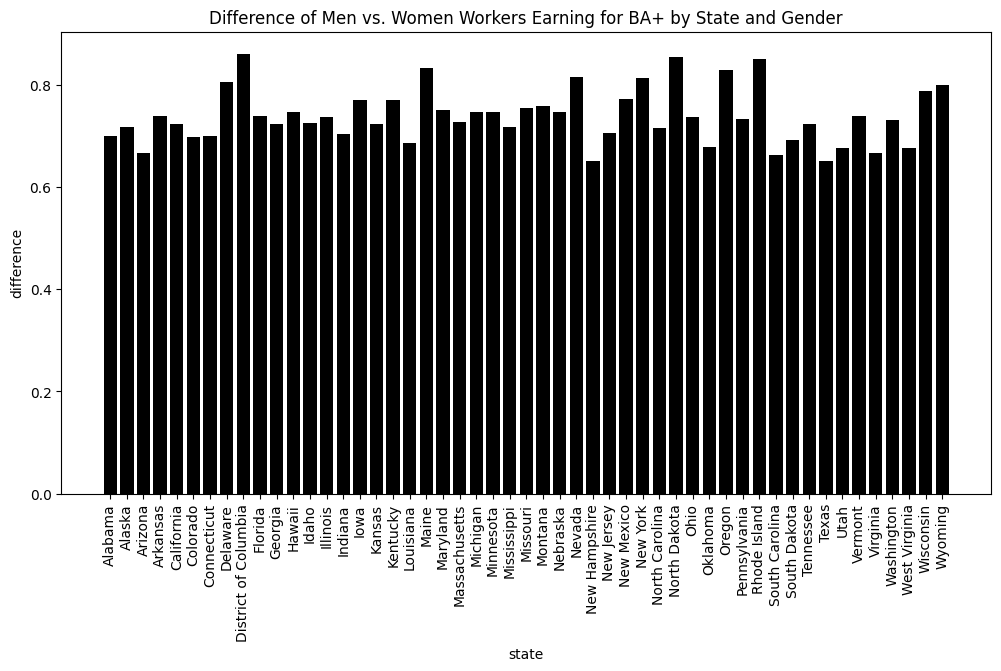

In [ ]:
bar_plot3(BA_df, 'Earnings Ratio', 'Difference of Men vs. Women Workers Earning for BA+ by State and Gender')



1                  State Women's Earnings Men's Earnings  Earnings Ratio  \
11  District of Columbia           74,000         86,000        0.860465   
37          North Dakota           47,000         55,000        0.854545   
42          Rhode Island           62,000         73,000        0.849329   
22                 Maine           50,000         60,000        0.833333   
40                Oregon           58,000         70,000        0.828571   
31                Nevada           53,000         65,000        0.815385   
35              New York           65,000         80,000        0.812500   
10              Delaware           58,000         72,000        0.805556   
53               Wyoming           52,000         65,000        0.800000   
52             Wisconsin           52,000         66,000        0.787879   

1  Difference  
11     12,000  
37      8,000  
42     11,000  
22     10,000  
40     12,000  
31     12,000  
35     15,000  
10     14,000  
53     13,000  
52 

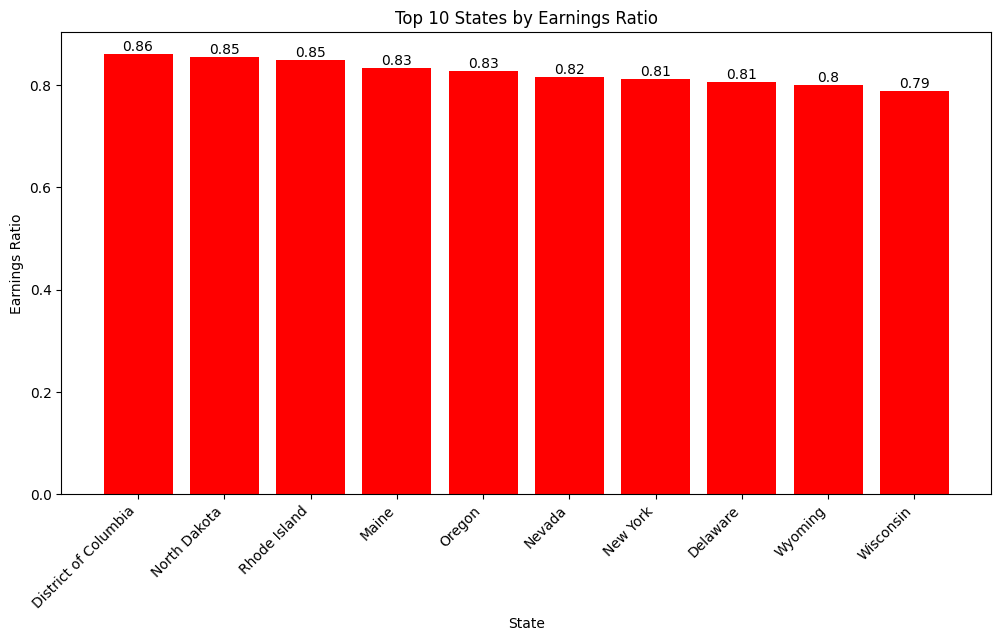

In [ ]:
# Convert 'Earnings Ratio' column to numeric
BA_df['Earnings Ratio'] = pd.to_numeric(BA_df['Earnings Ratio'], errors='coerce')

# Sort the DataFrame by 'Earnings Ratio' for correct ordering on the x-axis
BA_df_sort = BA_df.sort_values(by='Earnings Ratio', ascending=False)

# Convert 'Earnings Ratio' column to numeric, handling errors by coercing to NaN
BA_df_sort['Earnings Ratio'] = pd.to_numeric(BA_df_sort['Earnings Ratio'].replace('[\$,]', '', regex=True), errors='coerce')

# Remove rows with NaN values in 'Earnings Ratio' column
BA_df_sort = BA_df_sort.dropna(subset=['Earnings Ratio'])

# Select and plot the top 10 values in descending order
top_10_df = BA_df_sort.nlargest(10, 'Earnings Ratio')
print(top_10_df)

# Define function
def bar_plot3(data, x_column, y_column, title):
    plt.figure(figsize=(12, 6))
    bars = plt.bar(data[x_column], data[y_column], color='red')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')

    # Display data labels on the bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

    plt.show()

# Call the function to create the bar plot
bar_plot3(top_10_df, 'State', 'Earnings Ratio', 'Top 10 States by Earnings Ratio')



The pay gap is consistent across all states. The earnings ratio is between 0.6 to 0.8.

In [ ]:
labor_part = cleanData('Labor partic by race and state', 2)
labor_part = labor_part.iloc[3:54,[0,7,16]]
# if negative then more men than women
labor_part['Labor Participation difference'] = labor_part['All Women'] - labor_part['All Men']
labor_part.head()

2,State,All Women,All Men,Labor Participation difference
3,Alabama,0.532,0.644,-0.112
4,Alaska,0.672,0.75,-0.078
5,Arizona,0.548,0.65,-0.102
6,Arkansas,0.542,0.643,-0.101
7,California,0.575,0.702,-0.127


In [ ]:
parttime_df = cleanData('Working part time by state', 1)
parttime_df = parttime_df.iloc[3:54,0:3]
# if negative then more men than women
parttime_df['Difference'] = parttime_df['Women'] - parttime_df['Men']
parttime_df.columns = parttime_df.columns.fillna('State')
parttime_df.head()

1,State,Women,Men,Difference
3,Alabama,0.263,0.152,0.111
4,Alaska,0.286,0.125,0.161
5,Arizona,0.289,0.171,0.118
6,Arkansas,0.249,0.153,0.096
7,California,0.316,0.178,0.138


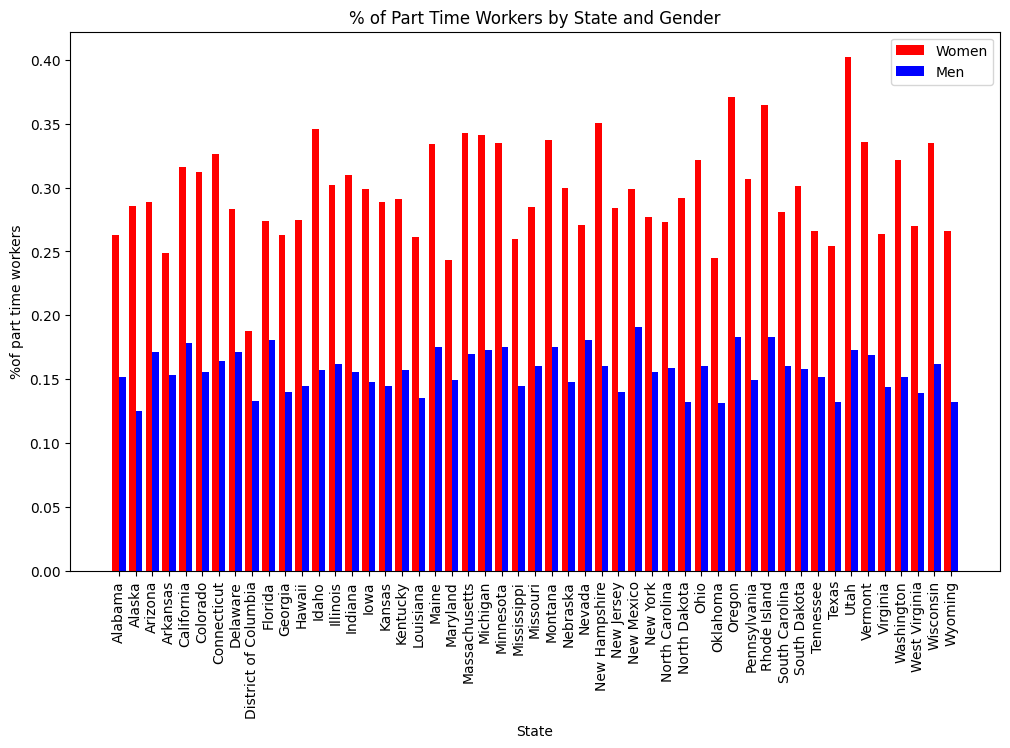

In [ ]:
bar_plot2(parttime_df, 'Women', 'Men', 'State', '%of part time workers', '% of Part Time Workers by State and Gender')

In every state there are more women working part time jobs than men.

In [ ]:
df8 = cleanData('Industry dist by state', 2)
industry_df = df8.iloc[3:54,[0,9,20]]
# if positive then more men than women
industry_df['Difference'] =  industry_df['Total Number of Men Workers'] - industry_df['Total Number of Women Workers']
print(industry_df.head())

2       State Total Number of Women Workers Total Number of Men Workers  \
3     Alabama                        945591                     1074410   
4      Alaska                        172109                      202081   
5     Arizona                       1306043                     1504477   
6    Arkansas                        590913                      659002   
7  California                       7888723                     9387530   

2 Difference  
3     128819  
4      29972  
5     198434  
6      68089  
7    1498807  


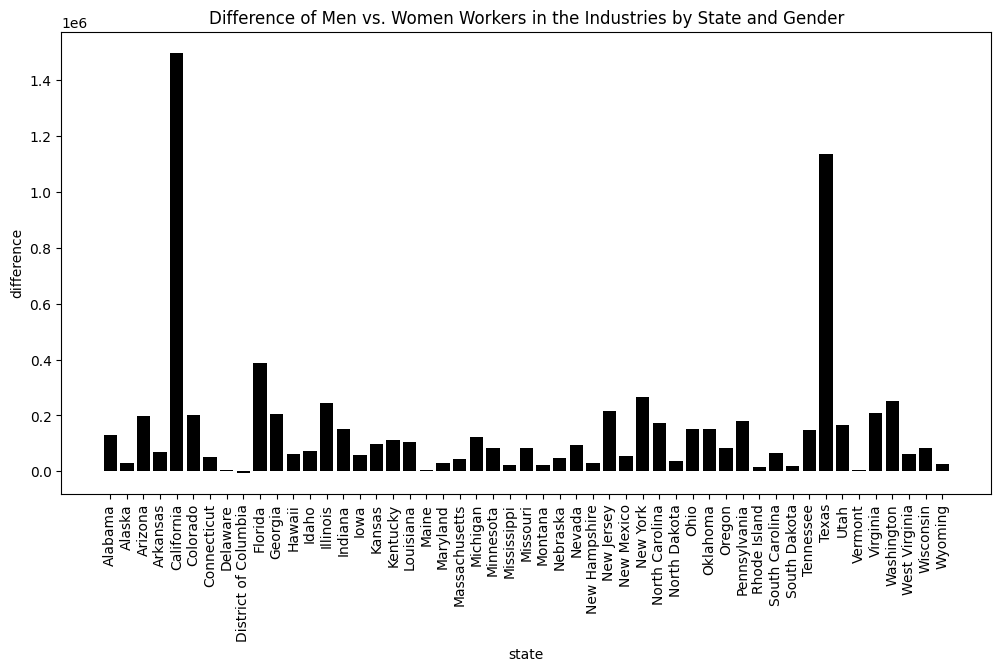

In [ ]:
bar_plot3(industry_df, 'Difference of Men vs. Women Workers in the Industries by State and Gender')

Califronia and Texas have the highest gap between women and men workers in the country (by a long shot!!). Could the data be skewed?

Summary points:
1. Men make more than woman in all states. The income gap ratio range from 0.6 to 0.8.
2. Despite men and women graduating with the same level of degree, men still make more money.
3. More men are in the workforce than women. This is due to long standing and regressive ideas of womens' introduction into the work force.
4. Women work more part time jobs than men. An assumption for this is more women have extra responsibilities aside from work that require as much/ more attention and therefore cannot commit to a full time job.


The gender pay gap in STEM fields in the United States continues to be a persistent and concerning issue. Despite advancements in gender equality, women in STEM occupations often face disparities in compensation compared to their male counterparts. Numerous studies have highlighted the existence of a pay gap, attributing it to various factors such as unconscious biases, lack of representation in leadership roles, and workplace cultures that may inadvertently favor men. Women in STEM fields, despite demonstrating equal or even superior qualifications, skills, and performance, frequently find themselves earning less than men in similar roles. Addressing and rectifying the gender pay gap in STEM is crucial not only for promoting fairness and equality but also for encouraging greater diversity and innovation in these critical sectors that drive technological advancements and scientific breakthroughs.

## ADDITIONAL DATA SOURCES

### Gender CSV data exploration

We will utilize the global data available on the Gender Data Portal by the World Bank to conduct a cross-country analysis of women in STEM for the year 2013. The Gender Data Portal offers current gender statistics presented through compelling narratives and data visualizations. The platform aims to improve the understanding of gender-related data, fostering analyses that contribute to well-informed policy decisions.

Access the data at https://genderdata.worldbank.org.

In [ ]:
# Set display options to show more content in cells
pd.set_option('display.max_colwidth', None)  # Show all content in each cell

# Read in data
df10 = pd.read_csv('Gender_StatsData.csv')

# Filter data to applicable Indicator Name "Female professional and technical workers (% of total)"
global_stem_2006 = df10.loc[df10['Indicator Code']== 'SG.GEN.TECH.ZS']

# Filter year to 2006 and drop last column 'Unnamed'
years =  ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005','2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'Unnamed: 67']
global_stem_2006 = global_stem_2006.drop(labels=years, axis=1)

# Remove countrys with null values
global_stem_2006 = global_stem_2006.dropna(axis=0)

# Show
global_stem_2006.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    0 non-null      object 
 1   Country Code    0 non-null      object 
 2   Indicator Name  0 non-null      object 
 3   Indicator Code  0 non-null      object 
 4   2006            0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 0.0+ bytes


After parsing out our data we are left with 99 countries reported female STEM workforce from 2006.

In [ ]:
us_tech = global_stem_2006.loc[(global_stem_2006['Country Name'] == 'United States'), '2006'].values[0]
print('The share of female professional and technical workers for the US was', us_tech, '% in 2006')

The share of female professional and technical workers for the US was Series([], Name: 2006, dtype: float64) % in 2006


According to this data source in 2006 women made up 55% of the total professional and technical workforce. This is interesting when comopared to the 2013 dataset where the national average for women employed in Managerial and Professional roles was 40%. The national average of women as a share of STEM workers was even lower - 29% in 2013. This could just be a data definition different: what constitutes technical worker vs. STEM denoted fields, etc.

In [ ]:
country_avg = global_stem_2006.groupby('Country Name').mean()
country_avg

,Indicator Code,2006
Country Name,,


The follow table displays the average percentage of women who make up the professional and technical workforce in 99 countries in 2006.

In [ ]:
country_stem(global_stem_2006, 'Zambia')

303501    31.0
Name: 2006, dtype: float64

This function allows any country to be input to view the percentage of women who make up the professional and technical workforce.

### Technology csv data exploration

In [ ]:
df11 = pd.read_csv('Technology.csv')
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14943 entries, 0 to 14942
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  14943 non-null  object 
 1   Indicator Code  14943 non-null  object 
 2   Country Name    14943 non-null  object 
 3   Country Code    14943 non-null  object 
 4   Year            14943 non-null  int64  
 5   Value           14943 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 700.6+ KB


To look into this huge dataset first we'll skim the indicator names to see if there are any of direct value/correlation to our project.

In [ ]:
df11['Indicator Name'].unique()

array(['Account, female (% age 15+)', 'Account, male (% age 15+)',
       'Account (% age 15+)',
       'Made a digital payment, female (% age 15+)',
       'Made a digital payment, male (% age 15+)',
       'Made a digital payment (% age 15+)',
       'Made or received a digital payment, female (% age 15+)',
       'Made or received a digital payment, male (% age 15+)',
       'Made or received a digital payment (% age 15+)',
       'Mobile money account, female (% age 15+)',
       'Mobile money account, male (% age 15+)',
       'Mobile money account (% age 15+)',
       'Received digital payments, female (% age 15+)',
       'Received digital payments, male (% age 15+)',
       'Received digital payments (% age 15+)',
       'Female share of graduates in Education programmes, tertiary (%)',
       'Female share of graduates from Science, Technology, Engineering and Mathematics (STEM) programmes, tertiary (%)',
       'Female share of graduates in Information and Communication Techn

The two that stand out are:
* 'Female share of graduates from Science, Technology, Engineering and Mathematics (STEM) programmes, tertiary (%)
* 'Female share of graduates in Information and Communication Technologies programmes, tertiary (%)'

So we'll create two respective dataframes to further investigate this data.

In [ ]:
#Create subset of df11
stem_grad = df11[df11['Indicator Name']=='Female share of graduates from Science, Technology, Engineering and Mathematics (STEM) programmes, tertiary (%)']

#Rename colnames
stem_grad.rename(columns = {'Value':'Women grads in STEM %'}, inplace = True)

#Display
stem_grad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 8270 to 9492
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Indicator Name         1223 non-null   object 
 1   Indicator Code         1223 non-null   object 
 2   Country Name           1223 non-null   object 
 3   Country Code           1223 non-null   object 
 4   Year                   1223 non-null   int64  
 5   Women grads in STEM %  1223 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 66.9+ KB


In [ ]:
stem_grad['Country Name'].nunique()

155

In [ ]:
np.sort(stem_grad['Year'].unique())

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
print('The average % of women graduates in STEM by country from 1998 to 2019')
stem_grad.groupby('Country Name')['Women grads in STEM %'].mean()

The average % of women graduates in STEM by country from 1998 to 2019
Country Name
Albania               45.861361
Algeria               51.338239
American Samoa        18.181820
Andorra               19.448225
Angola                38.846947
                        ...    
Uzbekistan            24.606230
Venezuela, RB         42.805710
Vietnam               27.116332
West Bank and Gaza    44.432529
Zimbabwe              25.624707
Name: Women grads in STEM %, Length: 155, dtype: float64


In [ ]:
usa = stem_grads_func(stem_grad, 'United States')
usa.iloc[:,0]

0    33.98544
1    33.38695
2    31.86863
3    31.62665
4    30.97884
5    30.90634
6    31.39109
7    31.45829
Name: Women grads in STEM %, dtype: float64

In [ ]:
#Function to plot women's share of STEM graduates by country
def stem_grad_plot(df, country):
  country_df = stem_grads_func(df, country)

  x = country_df.iloc[:,1]
  y = country_df.iloc[:,0]

  plt.plot(x,y)
  plt.title(f"Womens share of STEM grads: {country}")
  plt.xlabel('Year')
  plt.ylabel('% of Women STEM grads')
  plt.show()

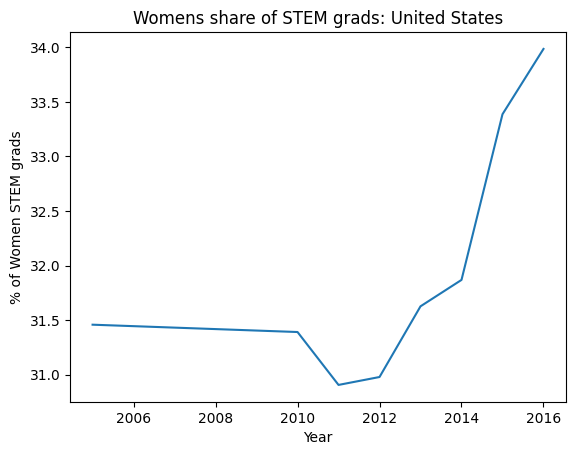

In [ ]:
stem_grad_plot(stem_grad, 'United States')

The graphical representation of female STEM graduates in the United States presents an optimistic outlook, indicating a significant increase in the number of women entering this educational field, particularly surging after 2012. In response, industries and businesses need to adapt by reassessing their hiring procedures, addressing any internal biases against women, fostering an inclusive and welcoming company culture that is mindful of gender, enhancing hiring pipelines to broaden women's access to well-paying and meaningful positions, and, critically, revisiting compensation policies and practices, among other necessary actions.

Lets compare the US to another country with the highest percentage of female STEM graduates

In [ ]:
max_stem = stem_grad.groupby('Country Name')['Women grads in STEM %'].max().sort_values(ascending= False)
max_stem.head(30)

Country Name
Sint Maarten (Dutch part)    75.00000
Antigua and Barbuda          75.00000
Qatar                        73.86760
Andorra                      66.66667
Myanmar                      66.23127
Brunei Darussalam            62.33766
Liechtenstein                62.16216
Oman                         59.03497
Sierra Leone                 58.97436
Algeria                      58.16980
Saudi Arabia                 57.87780
Liberia                      57.54509
Kyrgyz Republic              56.84905
British Virgin Islands       56.41026
Panama                       56.23862
Tunisia                      55.40910
Benin                        54.88478
Cayman Islands               53.84615
Bahrain                      53.78549
Albania                      52.78050
Mongolia                     51.75585
Eswatini                     51.02041
Gambia, The                  49.78873
Syrian Arab Republic         49.50636
Honduras                     49.49290
Uruguay                      49.47368

Surprisingly, numerous countries surpass the United States in terms of the proportion of women among STEM graduates. The list of the top 30 countries is provided above.

The United States faces notable gender pay disparities for women in STEM, attributed to factors such as occupational segregation, limited representation in leadership roles, implicit bias, stereotypes, workplace culture, the motherhood penalty, and various other contributors.

## CONCLUSION

In the face of educational progress and a growing presence of women in STEM, the persistence of wage gaps between men and women remains a noteworthy challenge. This pay disparity can be attributed to a complex interplay of factors, including systemic biases ingrained in hiring and promotion processes, the limited representation of women in leadership roles, and deeply rooted cultural norms that impact compensation structures.

The consequences of the global STEM gender pay gap extend beyond the individual, reverberating throughout the scientific and technological landscape. This disparity not only perpetuates gender inequality but also stifles the full realization of diverse perspectives within STEM and across various industries. The underrepresentation of women in higher-paying STEM positions hampers the ability to harness the full spectrum of talent and creativity, impeding the potential for groundbreaking innovations.

Addressing this pervasive issue requires a multifaceted approach. Policy reforms are crucial to dismantle institutionalized biases and promote equity in hiring, salary structures, and advancement opportunities. Advocacy for workplace inclusivity is essential to challenge and overturn discriminatory practices and create environments where all individuals, irrespective of gender, can thrive professionally. Moreover, a transformative shift in societal attitudes toward gender equality is imperative to break down deeply ingrained stereotypes and expectations.

Bridging the gender pay gap in STEM fields globally is not only a matter of justice and fairness but also a strategic imperative for fostering innovation, sustainability, and overall progress on a global scale. The full utilization of diverse talents and perspectives is a driving force behind advancements that can address complex challenges and shape a more inclusive and prosperous future.